# Projeto 1: Pegando dados da API do Banco Central

---------

## O que são APIs? 

* Formas de conectar sistemas.
* Seu código - banco de dados do Banco Central.
* Seu navegador - Servidor da globo e banco de dados de nóticias.


### A comunicação se dá através de métodos:

* GET
* POST

Geralmente utilizamos a biblioteca requests.

In [1]:
import requests
import pandas as pd

In [2]:
info_google = requests.get("https://www.google.com.br/") #não pode faltar o "https"

print(info_google)

<Response [200]>


### Respostas de um servidor

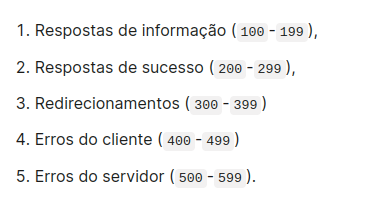

## API Banco Central

### A melhor forma de aprender sobre uma API é SEMPRE na documentação oficial.

O cara que criou se deu o trabalho de criar um texto explicando tudo nos mínimos detalhes para que a criação dele se torne útil. Valorize isso. 

Documentação Banco Central: https://dadosabertos.bcb.gov.br/organization/depec

Link útil pra aula: https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json

Localização dos códigos: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries



# SELIC

In [3]:
#selic = 432
#ipca = 433
#PTAX (dólar) = 1

codigo = 432

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

In [4]:
dados_selic = requests.get(url_banco_central)

### Json é uma estrutura de dados igual aos dicionários no Python.

Chave - Valor

In [5]:
json_selic = dados_selic.json()

In [6]:
df = pd.DataFrame(json_selic)
df

,data,valor
0,05/03/1999,45.00
1,06/03/1999,45.00
2,07/03/1999,45.00
3,08/03/1999,45.00
4,09/03/1999,45.00
...,...,...
9094,27/01/2024,11.75
9095,28/01/2024,11.75
9096,29/01/2024,11.75
9097,30/01/2024,11.75


In [7]:
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')

In [8]:
df = df.set_index('data')

In [9]:
df['valor'] = df['valor'].astype(float)

In [10]:
df = df.resample("M").last() #reorganizando os dados pra outra periodicidade.

<AxesSubplot:xlabel='data'>

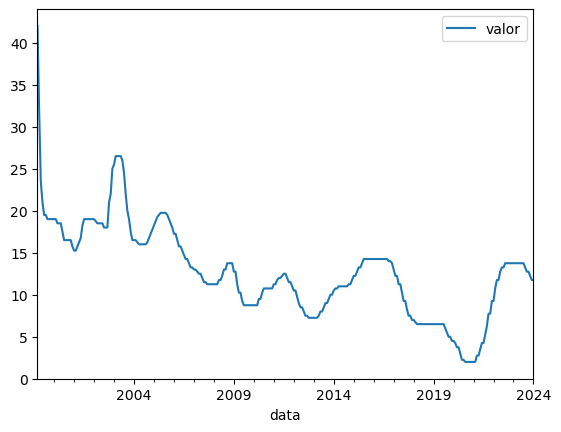

In [11]:
df.plot()

# IPCA

In [15]:
codigo = 433

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

dados_ipca = requests.get(url_banco_central)

json_ipca = dados_ipca.json()

df = pd.DataFrame(json_ipca)
df

,data,valor
0,01/01/1980,6.62
1,01/02/1980,4.62
2,01/03/1980,6.04
3,01/04/1980,5.29
4,01/05/1980,5.70
...,...,...
523,01/08/2023,0.23
524,01/09/2023,0.26
525,01/10/2023,0.24
526,01/11/2023,0.28


In [16]:
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')
df = df.set_index('data')
df['valor'] = df['valor'].astype(float)
df

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2023-08-01,0.23
2023-09-01,0.26
2023-10-01,0.24


In [18]:
df = df.resample("Y").sum() #reorganizando os dados pra outra periodicidade.
df

,valor
data,
1980-12-31,71.07
1981-12-31,69.05
1982-12-31,73.92
1983-12-31,101.20
1984-12-31,120.55
1985-12-31,129.82
1986-12-31,61.29
1987-12-31,164.79
1988-12-31,264.11


<AxesSubplot:xlabel='data'>

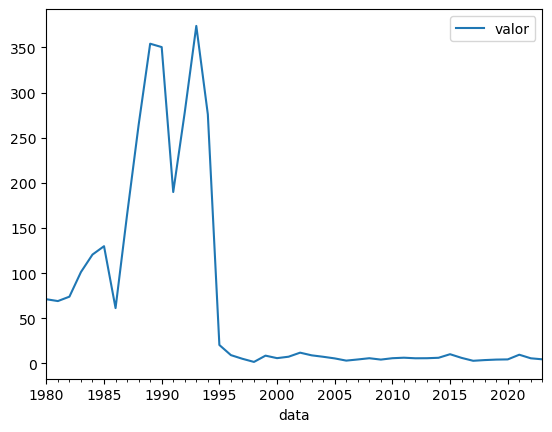

In [19]:
df.plot()

# Dolar

In [20]:
codigo = 1

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

dados_dolar = requests.get(url_banco_central)

json_dolar = dados_dolar.json()

df = pd.DataFrame(json_dolar)
df

,data,valor
0,28/11/1984,2828.0000
1,29/11/1984,2828.0000
2,30/11/1984,2881.0000
3,03/12/1984,2881.0000
4,04/12/1984,2881.0000
...,...,...
9807,22/01/2024,4.9490
9808,23/01/2024,4.9715
9809,24/01/2024,4.9192
9810,25/01/2024,4.9232


In [21]:
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')
df = df.set_index('data')
df['valor'] = df['valor'].astype(float)
df

,valor
data,
1984-11-28,2828.0000
1984-11-29,2828.0000
1984-11-30,2881.0000
1984-12-03,2881.0000
1984-12-04,2881.0000
...,...
2024-01-22,4.9490
2024-01-23,4.9715
2024-01-24,4.9192


In [22]:
df = df.resample("M").last() #reorganizando os dados pra outra periodicidade.
df

,valor
data,
1984-11-30,2881.0000
1984-12-31,3184.0000
1985-01-31,3585.0000
1985-02-28,3951.0000
1985-03-31,4450.0000
...,...
2023-09-30,5.0076
2023-10-31,5.0575
2023-11-30,4.9355


In [29]:
# Ultimos 5 anos
print(df.loc['2010-01-31':])

             valor
data              
2010-01-31  1.8748
2010-02-28  1.8110
2010-03-31  1.7810
2010-04-30  1.7306
2010-05-31  1.8167
...            ...
2023-09-30  5.0076
2023-10-31  5.0575
2023-11-30  4.9355
2023-12-31  4.8413
2024-01-31  4.9125

[169 rows x 1 columns]


<AxesSubplot:xlabel='data'>

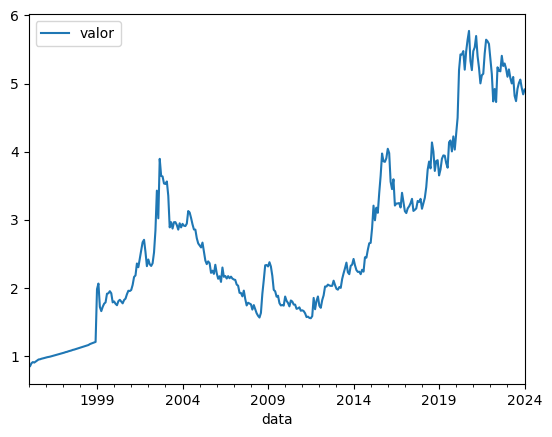

In [42]:
df.loc['1995-01-31':].plot()

<AxesSubplot:xlabel='data'>

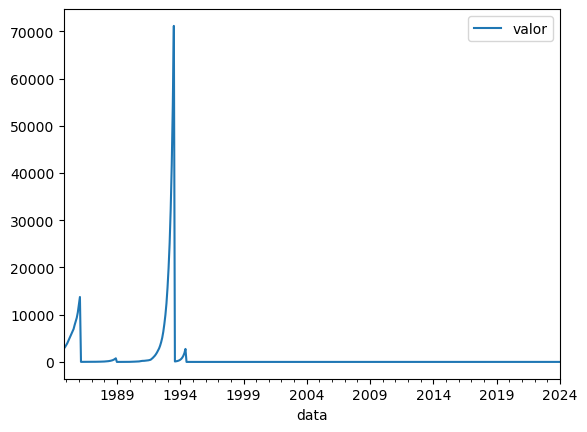

In [23]:
df.plot()